In [1]:
# import numerical packages
import numpy as np
import pandas as pd

In [2]:
#import data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#magic command to display plots in jupyter
%matplotlib inline

### Importing and preparing the dataset

In [4]:
# load the dataset from scikit-learn library 
from sklearn.datasets import load_boston

In [5]:
boston = load_boston()

In [6]:
# check info axis of the object
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [7]:
# check the size and number of columns
boston.data.shape

(506, 13)

In [8]:
# print the column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [9]:
# read the description of the dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Build the dataframe using the boston data and place the feature names as the rows

In [10]:
# Place the feature names as the name of the columns
bdf = pd.DataFrame(boston.data, columns=boston.feature_names)

In [11]:
# check the first 5 rows of the dataframe
bdf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


----
#### The 'medv' which is usually the target variable is not included in the dataframe. It is the Median value of owner-occupied homes in $1000's. 

In [12]:
# add the target 'medv' as Price column
bdf['Price'] = boston.target

In [13]:
# check for any missing data. isnull() gives back a boolean if there is missing information and sum willadd it all up. 
bdf.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [14]:
# get the first 5 rows of the dataframe
bdf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Descriptive Statistics

In [15]:
# get the summary statistics of the dataset
bdf.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [16]:
# list all columns with their data types and the number of non-null values in each column
bdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Price      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [17]:
# sns.pairplot(bdf)

The pairplot shows data plotted against each other. We can see correlation with our Price to LSTAT and RM. RAD and TAX appear to be correlated as well. 



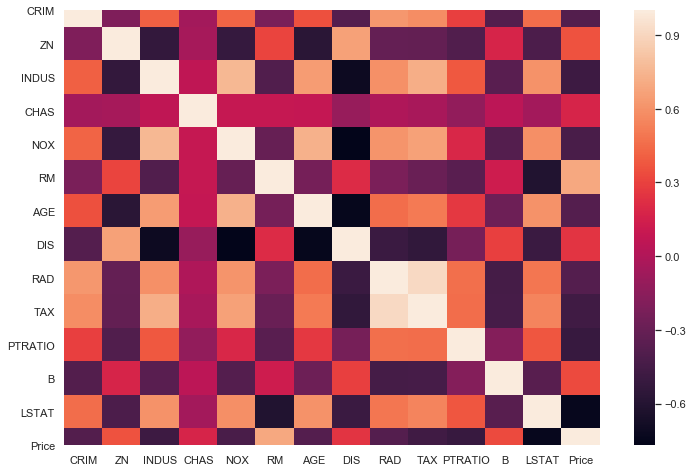

In [80]:
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(bdf.corr())

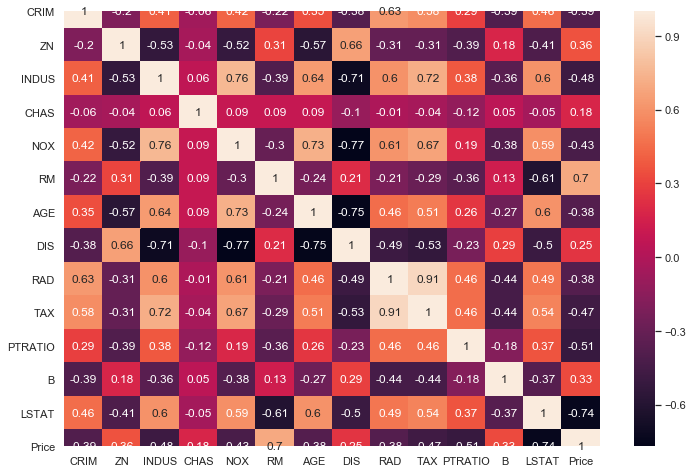

In [81]:
correlation_matrix=bdf.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
# annot=True parameter prints the values inside the square
# values closer to 1 means a strong positive correlation
# values closer to -1 means a strong negative correlation

The heatmap appear to show a high correlation between the target variable of Price and two other variables, the percentage of lower status (LSTAT) 
and average number of rooms per dwelling (Rooms). 


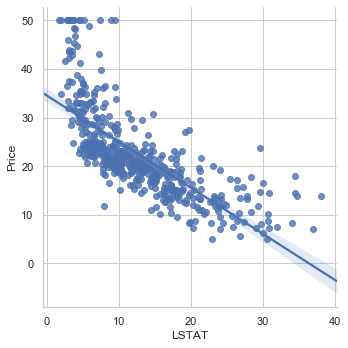

In [96]:
# negative correlation of percentage of lower status (LSTAT) and Price
sns.lmplot(x = 'LSTAT', y = 'Price', data = bdf)

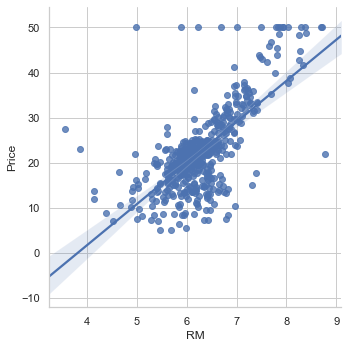

In [95]:
# positive correlation between average number of rooms per dwelling (Rooms) and price. 
sns.lmplot(x = 'RM', y = 'Price', data = bdf)

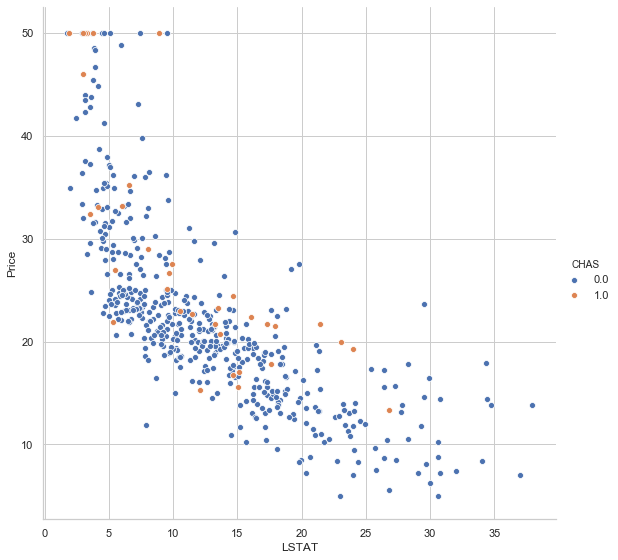

In [104]:
sns.pairplot(data= bdf, hue = 'CHAS',x_vars = 'LSTAT', y_vars = 'Price',height = 8, aspect = 1)

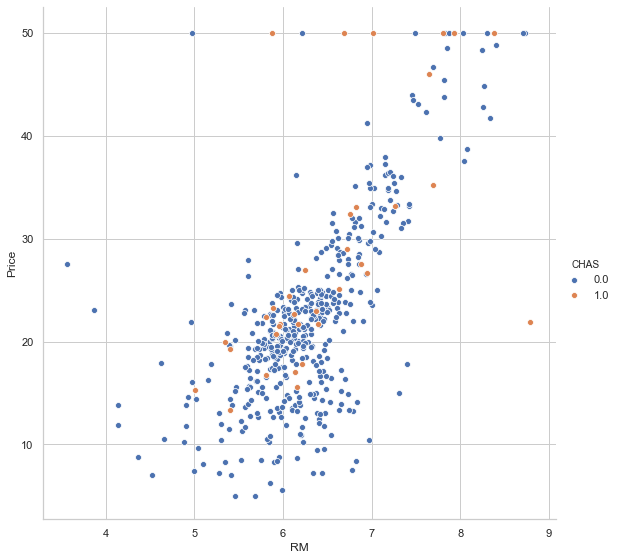

In [105]:
sns.pairplot(data= bdf, hue = 'CHAS',x_vars = 'RM', y_vars = 'Price',height = 8, aspect = 1)

### Inferential Statistics

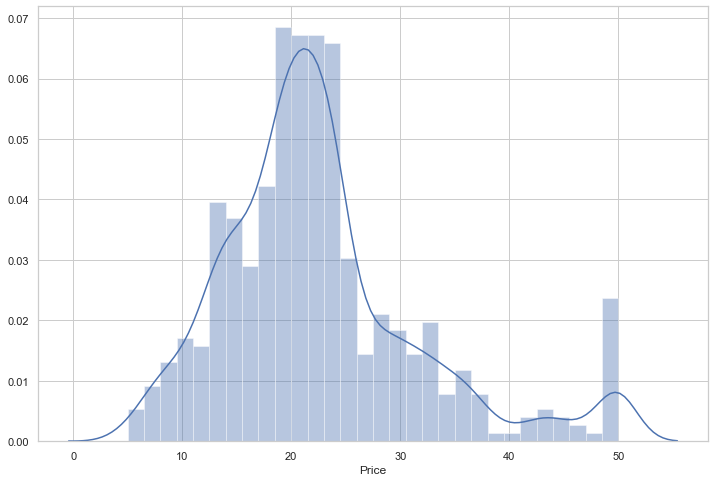

In [82]:
# plot the distribution of Price 
sns.set_style('whitegrid')
sns.distplot(bdf['Price'], bins = 30)

The median value or price of houses appear to follow a normal distribution. Some outliers in the 48-50 mark.

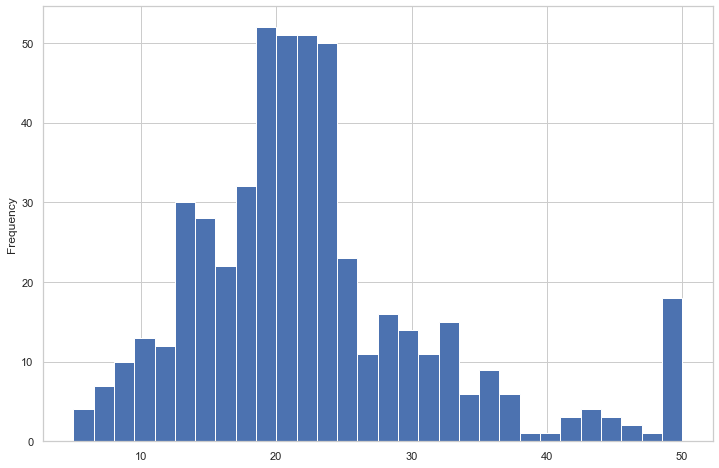

In [84]:
# Another plot similar to above but to get the count on the y-axis. 
bdf['Price'].plot.hist(bins = 30)

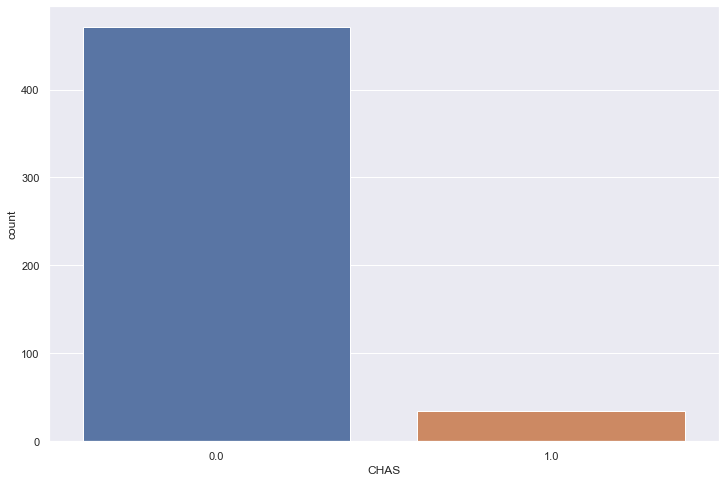

In [20]:
# Plot the houses that do not tract river and those that tract the river. 

sns.countplot(x = 'CHAS', data = bdf)

CHAS variable in a countplot. We can see that there are more houses that do not tract the Charles river in our dataset than those that tract the river. 

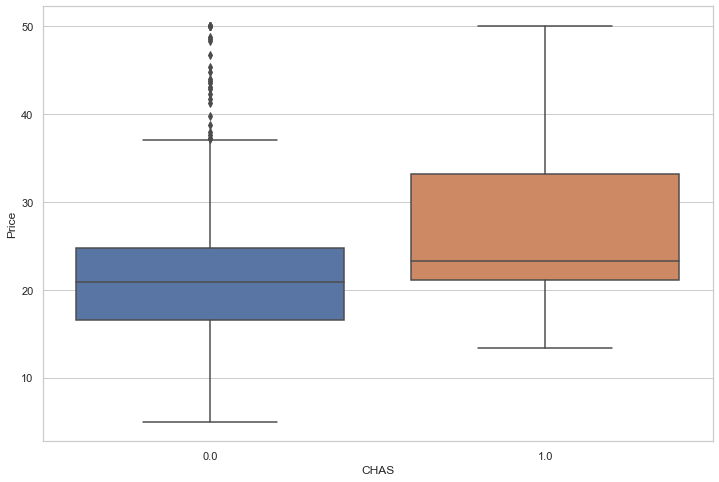

In [91]:
# Boxplot to show means 
sns.boxplot(x = 'CHAS', y= 'Price', data=bdf)

The boxplot suggest, in general house prices are higher for houses that tract the river and those that do not. This boxplot shows  that the median house price is higher for those that tract the river. There is some outliers for the houses that do not tract the river, house prices that are unusual relative to the mean highest house price recorded. It also shows that there is some overlap of the house prices. 

In [26]:
# sns.pairplot(bdf, hue = 'CHAS')

In [27]:
# slice the dataframe
nr = bdf[bdf['CHAS']== 0.0]
r = bdf[bdf['CHAS']== 1.0]

In [28]:
nr.count()

CRIM       471
ZN         471
INDUS      471
CHAS       471
NOX        471
RM         471
AGE        471
DIS        471
RAD        471
TAX        471
PTRATIO    471
B          471
LSTAT      471
Price      471
dtype: int64

In [29]:
r.count()

CRIM       35
ZN         35
INDUS      35
CHAS       35
NOX        35
RM         35
AGE        35
DIS        35
RAD        35
TAX        35
PTRATIO    35
B          35
LSTAT      35
Price      35
dtype: int64

In [30]:
nr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [31]:
# Don't know if this is needed
df1 = nr['Price']
df2 = r['Price']

In [32]:
# Don't know if this is needed
df3 = pd.concat([df1,df2])
river = ['near']*471 + ['away']*35
df4 = pd.DataFrame({'River Charles': river, 'price': df3})
df4

,River Charles,price
0,near,24.0
1,near,21.6
2,near,34.7
3,near,33.4
4,near,36.2
...,...,...
363,away,16.8
364,away,21.9
369,away,50.0
370,away,50.0


In [33]:
# Don't know if this is needed
df4[df4['River Charles']=='away']['price']

142    13.4
152    15.3
154    17.0
155    15.6
160    27.0
162    50.0
163    50.0
208    24.4
209    20.0
210    21.7
211    19.3
212    22.4
216    23.3
218    21.5
219    23.0
220    26.7
221    21.7
222    27.5
234    29.0
236    25.1
269    20.7
273    35.2
274    32.4
276    33.2
277    33.1
282    46.0
283    50.0
356    17.8
357    21.7
358    22.7
363    16.8
364    21.9
369    50.0
370    50.0
372    50.0
Name: price, dtype: float64

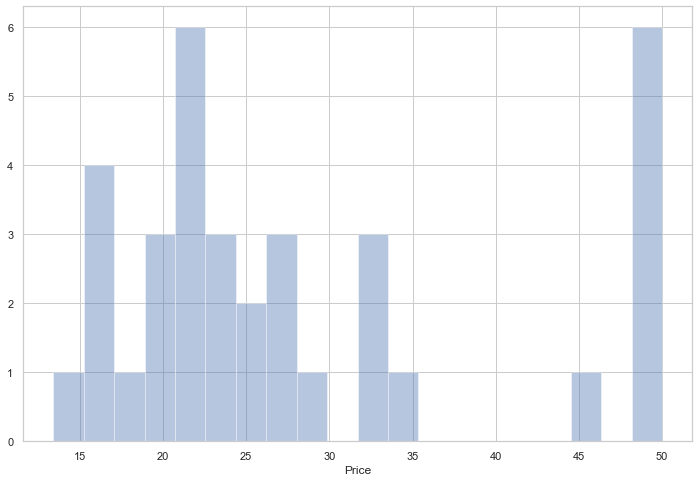

In [34]:
# plot of house prices that track the river
sns.distplot(r['Price'],bins = 20, kde = False)

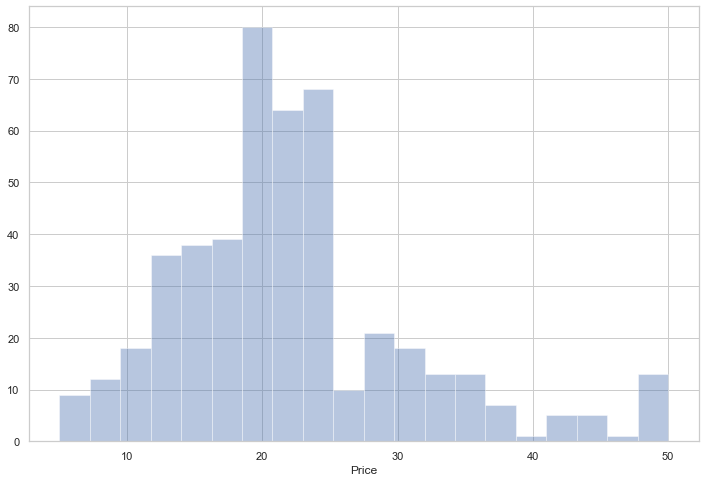

In [35]:
# plot for houses that do not track the river
sns.distplot(nr['Price'], bins = 20, kde = False)

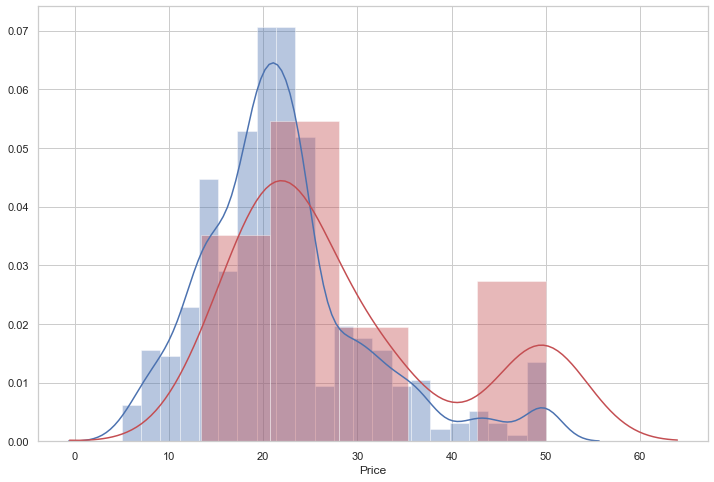

In [36]:
# Y axis shows density rather than count.
sns.distplot(nr['Price'])
sns.distplot(r['Price'], color = 'r' )

### linear regression


In [37]:
import scipy.stats as stats

In [38]:
print(stats.ttest_ind(nr['Price'], r['Price'] ))

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)


We get a very small pvalue lower that indicate that we reject the null hypothesis.

In [39]:
stats.f_oneway(nr['Price'], r['Price'])

F_onewayResult(statistic=15.971512420371955, pvalue=7.390623170520815e-05)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X = bdf[['Price','CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
 'B', 'LSTAT']]
y = bdf['CHAS']


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)


C:\Users\james\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
predictions = logmodel.predict(X_test)

In [46]:
from sklearn.metrics import classification_report

In [47]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       123
         1.0       1.00      1.00      1.00         4

    accuracy                           1.00       127
   macro avg       1.00      1.00      1.00       127
weighted avg       1.00      1.00      1.00       127



In [48]:
import keras as kr

Using TensorFlow backend.


In [49]:
import sklearn.preprocessing as pre
# For splitting data sets
import sklearn.model_selection as mod
# For whitening
import sklearn.decomposition as dec

In [50]:
x = bdf[['CHAS','CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = bdf['Price']

In [51]:
x

,CHAS,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.0,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.0,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.0,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.0,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.0,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.0,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.0,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.0,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [52]:
x_train, x_test, y_train, y_test = mod.train_test_split(x, y, test_size=0.2)

### Building and Training

In [53]:
m = kr.models.Sequential()


In [54]:
m.add(kr.layers.Dense(20, input_dim=13, activation="relu"))
m.add(kr.layers.Dense(1, activation="linear"))
m.compile(loss="mean_squared_error", optimizer="adam")

In [55]:
m.fit(x_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
404/404 [==============================] - 0s 1ms/step - loss: 7262.6819
Epoch 2/100
404/404 [==============================] - 0s 133us/step - loss: 2740.4123
Epoch 3/100
404/404 [==============================] - 0s 175us/step - loss: 844.8959
Epoch 4/100
404/404 [==============================] - 0s 126us/step - loss: 174.1428
Epoch 5/100
404/404 [==============================] - 0s 141us/step - loss: 97.9642
Epoch 6/100
404/404 [==============================] - 0s 123us/step - loss: 83.0233
Epoch 7/100
404/404 [==============================] - 0s 158us/step - loss: 73.8240
Epoch 8/100
404/404 [==============================] - 0s 116us/step - loss: 66.6185
Epoch 9/100
404/404 [==============================] - 0s 148us/step - loss: 61.2370
Epoch 10/100
404/404 [==============================] - 0s 138us/step - loss: 58.9600
Epoch 11/100
404/404 [==============================] - 0s 242us/step - loss: 58.4965
Epoch 12/100
404/404 [==============================] - 0s 

404/404 [==============================] - 0s 126us/step - loss: 27.8436
Epoch 97/100
404/404 [==============================] - 0s 205us/step - loss: 27.1211
Epoch 98/100
404/404 [==============================] - 0s 128us/step - loss: 27.9814
Epoch 99/100
404/404 [==============================] - 0s 128us/step - loss: 28.5727
Epoch 100/100
404/404 [==============================] - 0s 202us/step - loss: 29.5045


In [56]:
m.predict(x_test).round().T

array([[22., 36., 17., 20., 26., 27., 28., 18., 22., 19., 28., 12., 25.,
        22., 27., 14., 20.,  3., 33., 32., 13., 24., 31., 26., 30., 23.,
        20., 21., 14.,  9., 27., 17., 22., 25., 22., 23., 25., 31., 26.,
        40., 23., 27., 27., 31., 18., 38., 29., 26., 13., 18., 28., 10.,
        25., 17., 32., 36., 19., 25., 17., 28., 20., 24., 24., 23., 33.,
        25., 24., 15., 12.,  9., 25., 14., 22.,  9., 27., 23., 19., 19.,
        23., 21., 18., 26., 29., 18., 24., 26., 15., 18., 15., 17., 21.,
        37., 22., 21., 15., 31., 32., 27., 23., 38., 29., 25.]],
      dtype=float32)

In [57]:
y_test.as_matrix().astype(np.float32)

C:\Users\james\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([19.4, 46. , 11.5, 21.2, 20.6, 24.4, 20.6, 16.2, 19.7, 13.4, 25. ,
       11.9, 23.3, 19.6, 21.9, 15.6, 15.2,  7. , 33.8, 31.7, 11. , 22.9,
       33.1, 19.4, 42.8, 21.2, 19.8, 22.2,  8.7, 16.5, 23.8, 13.4, 24.5,
       25. , 23.4, 15. , 20.9, 28.4, 22.7, 50. , 20.3, 23.7, 22.6, 24. ,
       17.5, 50. , 36.2, 50. ,  7.2, 17.1, 25. , 13.5, 23. , 18.3, 35.4,
       37.6, 18.9, 23.9, 23.1, 23.8, 19.9, 24.2, 20.6, 18.2, 30.8, 22. ,
       16.2, 12.3, 12.7,  6.3, 25. , 14. , 20.9, 14.4, 24.3, 27.9, 19.4,
       14.6, 20.3, 20.1, 17.4, 28.6, 50. , 13.8, 28.1, 27.1, 15.6, 12.1,
       11.3, 13.1, 18.8, 50. , 22.2, 19.1, 12.7, 23.6, 32.9, 24.8, 16.8,
       50. , 29. , 24.1], dtype=float32)

In [58]:
m.evaluate(x_test, y_test)

102/102 [==============================] - 0s 401us/step


30.46151221032236

In [59]:
scaler = pre.StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)

In [60]:
m = kr.models.Sequential()

m.add(kr.layers.Dense(20, input_dim=4, activation="relu"))
m.add(kr.layers.Dense(1, activation="linear"))

m.compile(loss="mean_squared_error", optimizer="adam")

### Scaling

In [61]:
scaler = pre.StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)

In [62]:
m = kr.models.Sequential()

m.add(kr.layers.Dense(20, input_dim=13, activation="relu"))
m.add(kr.layers.Dense(1, activation="linear"))

m.compile(loss="mean_squared_error", optimizer="adam")

In [63]:
m.fit(x_train_scaled, y_train, epochs=100, batch_size=10)

Epoch 1/100
404/404 [==============================] - 0s 867us/step - loss: 552.0906
Epoch 2/100
404/404 [==============================] - 0s 197us/step - loss: 517.0160
Epoch 3/100
404/404 [==============================] - 0s 126us/step - loss: 476.5001
Epoch 4/100
404/404 [==============================] - 0s 141us/step - loss: 427.3421
Epoch 5/100
404/404 [==============================] - 0s 116us/step - loss: 371.0248
Epoch 6/100
404/404 [==============================] - 0s 106us/step - loss: 312.7899
Epoch 7/100
404/404 [==============================] - 0s 114us/step - loss: 255.5865
Epoch 8/100
404/404 [==============================] - 0s 121us/step - loss: 204.2729
Epoch 9/100
404/404 [==============================] - 0s 146us/step - loss: 162.6208
Epoch 10/100
404/404 [==============================] - 0s 116us/step - loss: 129.2492
Epoch 11/100
404/404 [==============================] - 0s 114us/step - loss: 104.8436
Epoch 12/100
404/404 [==============================

Epoch 96/100
404/404 [==============================] - 0s 118us/step - loss: 11.6948
Epoch 97/100
404/404 [==============================] - 0s 106us/step - loss: 11.6289
Epoch 98/100
404/404 [==============================] - 0s 101us/step - loss: 11.5584
Epoch 99/100
404/404 [==============================] - 0s 114us/step - loss: 11.4631
Epoch 100/100
404/404 [==============================] - 0s 99us/step - loss: 11.3663


In [64]:
x_test_scaled = scaler.transform(x_test)
m.predict(x_test_scaled).round().T

array([[21., 42., 15., 20., 22., 22., 20., 17., 21., 15., 25., 15., 19.,
        16., 24., 14., 16.,  5., 35., 35., 13., 23., 32., 21., 39., 19.,
        21., 20.,  8., 14., 24., 13., 19., 24., 25., 18., 23., 26., 26.,
        47., 23., 26., 27., 30., 19., 42., 28., 24.,  8., 14., 28., 12.,
        21., 17., 37., 43., 17., 25., 17., 24., 18., 26., 20., 17., 29.,
        27., 19., 13., 12., 10., 22., 14., 19., 17., 28., 20., 20., 16.,
        21., 16., 20., 30., 28., 17., 25., 28., 16., 15., 14., 15., 18.,
        45., 21., 17., 14., 33., 32., 23., 18., 46., 28., 26.]],
      dtype=float32)

In [65]:
y_test.as_matrix().astype(np.float32)

C:\Users\james\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([19.4, 46. , 11.5, 21.2, 20.6, 24.4, 20.6, 16.2, 19.7, 13.4, 25. ,
       11.9, 23.3, 19.6, 21.9, 15.6, 15.2,  7. , 33.8, 31.7, 11. , 22.9,
       33.1, 19.4, 42.8, 21.2, 19.8, 22.2,  8.7, 16.5, 23.8, 13.4, 24.5,
       25. , 23.4, 15. , 20.9, 28.4, 22.7, 50. , 20.3, 23.7, 22.6, 24. ,
       17.5, 50. , 36.2, 50. ,  7.2, 17.1, 25. , 13.5, 23. , 18.3, 35.4,
       37.6, 18.9, 23.9, 23.1, 23.8, 19.9, 24.2, 20.6, 18.2, 30.8, 22. ,
       16.2, 12.3, 12.7,  6.3, 25. , 14. , 20.9, 14.4, 24.3, 27.9, 19.4,
       14.6, 20.3, 20.1, 17.4, 28.6, 50. , 13.8, 28.1, 27.1, 15.6, 12.1,
       11.3, 13.1, 18.8, 50. , 22.2, 19.1, 12.7, 23.6, 32.9, 24.8, 16.8,
       50. , 29. , 24.1], dtype=float32)

In [66]:
m.evaluate(x_test_scaled, y_test)

102/102 [==============================] - 0s 391us/step


20.173929616516713

### Whitening

In [67]:
pca = dec.PCA(n_components=13, whiten=True)
pca.fit(x_train)
x_train_white = pd.DataFrame(pca.transform(x_train), columns=x.columns)
x_train_white

,CHAS,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.612165,-0.126518,2.276225,2.127366,-0.108183,-0.019944,-0.066722,0.757909,0.972455,1.059563,0.649859,0.016259,0.715478
1,-0.177713,-0.389361,-1.063673,0.650885,-0.510155,-0.643191,-0.359109,1.382717,1.373989,-1.174077,-0.165932,-0.150846,-0.448576
2,1.651530,0.791476,-0.194871,0.409540,2.049957,-0.498232,0.290882,0.202009,0.219505,0.050331,1.793837,-0.150902,-1.755658
3,-0.819242,0.104878,-1.027247,1.883784,-0.065088,-1.666251,-0.551335,0.141712,-2.230502,-0.565080,1.121524,-0.823052,0.660511
4,-0.472376,-0.124256,1.339433,-0.044552,-0.193107,-0.320994,-0.138483,1.964575,1.613685,1.477488,-1.255988,0.347526,1.436341
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.076616,-0.174811,-0.444593,-0.309791,-0.539266,0.065857,0.611961,0.823932,0.266112,0.678590,-0.303769,-0.190005,-2.068550
400,-1.062582,0.244990,-0.567045,-0.719013,0.228304,-1.162605,-0.649381,0.401912,0.652782,1.287714,0.337658,-0.203079,0.345634
401,-0.145026,-0.449626,1.533535,0.274548,-0.415902,-0.560979,0.106358,1.353431,-1.300887,-1.047631,-0.523989,-0.144872,-0.866608
402,1.334731,-1.457254,-0.022849,-0.066258,-0.826490,-0.883482,-0.274519,-1.044126,0.229518,0.919798,0.128338,-0.466403,-2.336512


In [68]:
m = kr.models.Sequential()

m.add(kr.layers.Dense(100, input_dim=13, activation="tanh"))
m.add(kr.layers.Dense(1, activation="linear"))

m.compile(loss="mean_squared_error", optimizer="adam")

In [69]:
m.fit(x_train_white, y_train, epochs=100, batch_size=10)

Epoch 1/100
404/404 [==============================] - 0s 807us/step - loss: 570.3548
Epoch 2/100
404/404 [==============================] - 0s 118us/step - loss: 538.1792
Epoch 3/100
404/404 [==============================] - 0s 126us/step - loss: 497.3532
Epoch 4/100
404/404 [==============================] - 0s 123us/step - loss: 442.8866
Epoch 5/100
404/404 [==============================] - 0s 109us/step - loss: 376.3947
Epoch 6/100
404/404 [==============================] - 0s 116us/step - loss: 302.7733
Epoch 7/100
404/404 [==============================] - 0s 143us/step - loss: 230.3519
Epoch 8/100
404/404 [==============================] - 0s 153us/step - loss: 165.0735
Epoch 9/100
404/404 [==============================] - 0s 126us/step - loss: 113.1607
Epoch 10/100
404/404 [==============================] - 0s 121us/step - loss: 76.0712
Epoch 11/100
404/404 [==============================] - 0s 205us/step - loss: 52.0338
Epoch 12/100
404/404 [==============================] 

404/404 [==============================] - 0s 121us/step - loss: 9.3007
Epoch 97/100
404/404 [==============================] - 0s 128us/step - loss: 9.3031
Epoch 98/100
404/404 [==============================] - 0s 116us/step - loss: 9.1275
Epoch 99/100
404/404 [==============================] - 0s 116us/step - loss: 9.0320
Epoch 100/100
404/404 [==============================] - 0s 114us/step - loss: 8.9619


In [70]:
x_test_white = scaler.transform(x_test)
m.predict(x_test_white).round().T

array([[31.,  8., 21., 28., 25., 20., 36., 30., 34.,  0., 12., 22., 21.,
        27., 28., 25., 12., 10., 30., 23.,  6., 19., 27., 34.,  9., 31.,
        28., 26.,  4., 32., 25.,  9., 30., 30., 24., 10., 30., 30.,  1.,
        27., 35., 28., 32., 35., 23.,  7., 35., 19.,  4., 14., 27., 23.,
        18., 33., 30., 20., 35., 28., 31., 29., 19., 24., 20., 25., 25.,
        28., 35., 20., 27., 16., 18., 26., 27., 31., 37., 20., 34., 18.,
        30., 21., 34., 29., 25., 22., 28., 31., 21., 16., 20., 19., 34.,
         4., 30., 18.,  4., 27., 21., 19., 31., 27.,  7., 26.]],
      dtype=float32)

In [71]:
y_test.as_matrix().astype(np.float32)

C:\Users\james\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([19.4, 46. , 11.5, 21.2, 20.6, 24.4, 20.6, 16.2, 19.7, 13.4, 25. ,
       11.9, 23.3, 19.6, 21.9, 15.6, 15.2,  7. , 33.8, 31.7, 11. , 22.9,
       33.1, 19.4, 42.8, 21.2, 19.8, 22.2,  8.7, 16.5, 23.8, 13.4, 24.5,
       25. , 23.4, 15. , 20.9, 28.4, 22.7, 50. , 20.3, 23.7, 22.6, 24. ,
       17.5, 50. , 36.2, 50. ,  7.2, 17.1, 25. , 13.5, 23. , 18.3, 35.4,
       37.6, 18.9, 23.9, 23.1, 23.8, 19.9, 24.2, 20.6, 18.2, 30.8, 22. ,
       16.2, 12.3, 12.7,  6.3, 25. , 14. , 20.9, 14.4, 24.3, 27.9, 19.4,
       14.6, 20.3, 20.1, 17.4, 28.6, 50. , 13.8, 28.1, 27.1, 15.6, 12.1,
       11.3, 13.1, 18.8, 50. , 22.2, 19.1, 12.7, 23.6, 32.9, 24.8, 16.8,
       50. , 29. , 24.1], dtype=float32)

In [72]:
m.evaluate(x_test_white, y_test)

102/102 [==============================] - 0s 362us/step


170.21050397087546